In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_table('Ruisseau_hourly_1966-2006.txt', sep=';', skiprows=12, header=0, parse_dates=True, index_col=0, \
                  usecols=[0, 1, 2, 3, 4, 5], names=['Date', 'Qobs', 'Ptot', 'Fsol', 'Temp', 'PE'], na_values=[-99.]);
df.head(2)

,Qobs,Ptot,Fsol,Temp,PE
Date,,,,,
1966010101,NaN,0,0,11,2.9
1966010102,NaN,0,0,11,2.9


In [3]:
data = df.dropna(); data.head()

,Qobs,Ptot,Fsol,Temp,PE
Date,,,,,
1967082310,0,0,0,22.7,4.1
1967082311,0,0,0,22.7,4.1
1967082312,0,0,0,22.7,4.1
1967082313,0,0,0,22.7,4.1
1967082314,0,0,0,22.7,4.1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5ba8cd30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5d5ba26ac8>], dtype=object)

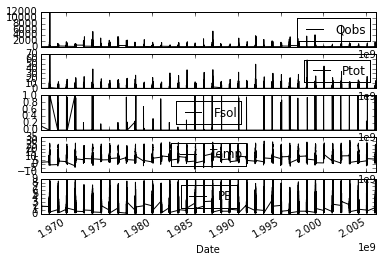

In [5]:
data.plot(subplots=True)

In [16]:
X = data[['Ptot', 'Fsol', 'Temp', 'PE']].values
y = data[['Qobs']].values

In [17]:
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [15]:
from sklearn import preprocessing

In [18]:
normalized_X = preprocessing.normalize(X)
standardized_X = preprocessing.scale(X)

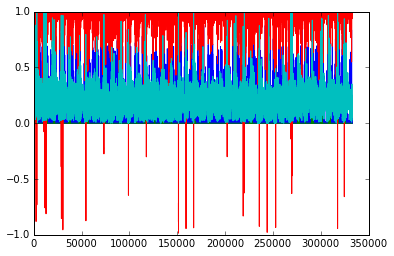

In [22]:
plt.plot(normalized_X)

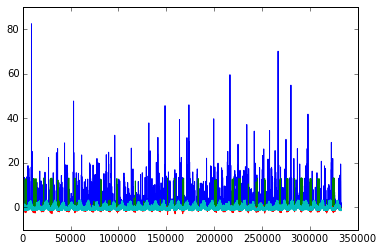

In [23]:
plt.plot(standardized_X)

In [29]:
print(normalized_X.shape, standardized_X.shape, y.shape)

(332873, 4) (332873, 4) (332873, 1)


In [27]:
from sklearn.ensemble import ExtraTreesRegressor

model1 = ExtraTreesRegressor().fit(normalized_X, y)

/home/hydrogo/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [33]:
expected = y
predicted1 = model1.predict(normalized_X)

In [34]:
from sklearn import metrics

In [40]:
metrics.r2_score(predicted1, expected)

0.68831512551789198

In [51]:
data_out = data.copy()
data_out['model1'] = predicted1

In [52]:
data_out.head()

,Qobs,Ptot,Fsol,Temp,PE,model1
Date,,,,,,
1967082310,0,0,0,22.7,4.1,0.057836
1967082311,0,0,0,22.7,4.1,0.057836
1967082312,0,0,0,22.7,4.1,0.057836
1967082313,0,0,0,22.7,4.1,0.057836
1967082314,0,0,0,22.7,4.1,0.057836


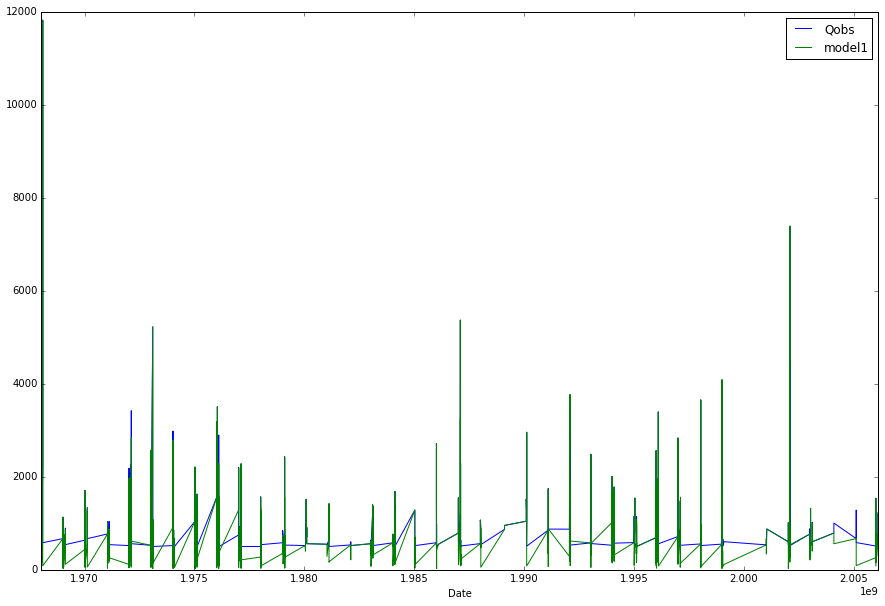

In [74]:
data_out[['Qobs', 'model1']][data_out.Qobs > 500].plot(figsize=(15,10))

In [80]:
data_out.index = pd.to_datetime(data_out.index, dayfirst=True); data_out.index

DatetimeIndex(['1970-01-01 00:00:01.967082310',
               '1970-01-01 00:00:01.967082311',
               '1970-01-01 00:00:01.967082312',
               '1970-01-01 00:00:01.967082313',
               '1970-01-01 00:00:01.967082314',
               '1970-01-01 00:00:01.967082315',
               '1970-01-01 00:00:01.967082316',
               '1970-01-01 00:00:01.967082317',
               '1970-01-01 00:00:01.967082318',
               '1970-01-01 00:00:01.967082319', 
               ...
               '1970-01-01 00:00:02.006123115',
               '1970-01-01 00:00:02.006123116',
               '1970-01-01 00:00:02.006123117',
               '1970-01-01 00:00:02.006123118',
               '1970-01-01 00:00:02.006123119',
               '1970-01-01 00:00:02.006123120',
               '1970-01-01 00:00:02.006123121',
               '1970-01-01 00:00:02.006123122',
               '1970-01-01 00:00:02.006123123',
               '1970-01-01 00:00:02.006123124'],
              dtype